In [27]:
from imblearn.over_sampling import SMOTE
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [5]:
df['gender'] = df.iloc[:,1].astype('category').cat.codes
df['ever_married'] = df.iloc[:,5].astype('category').cat.codes
df['work_type'] = df.iloc[:,6].astype('category').cat.codes
df['Residence_type'] = df.iloc[:,7].astype('category').cat.codes
df['smoking_status'] = df.iloc[:,10].astype('category').cat.codes

In [6]:
df = df.dropna()

# Oversample

In [7]:
test_df = df.sample(int(df.shape[0]*0.2),random_state=42)
train_df = df.drop(index=test_df.index)

In [8]:
X = train_df.iloc[:, 0:-1]
y = train_df.iloc[:, -1]

In [9]:
X_train, y_train = SMOTE().fit_resample(X,y)

In [10]:
X_train['stroke']=y_train

In [12]:
X_train.to_csv('over_train_data.csv')

In [14]:
X_test = test_df.iloc[:, 0:-1]
y_test = test_df.iloc[:, -1]

In [15]:
X_test,y_test = SMOTE().fit_resample(X_test,y_test)

In [16]:
X_test['stroke']=y_test

In [18]:
X_test['stroke'].value_counts()

0    928
1    928
Name: stroke, dtype: int64

In [19]:
X_test.to_csv('over_test_data.csv')

# Downsample

In [20]:
X = df.iloc[:, 0:-1]
y = df.iloc[:, -1]

In [21]:
from imblearn.under_sampling import RandomUnderSampler

sampling_strategy = 1
rus = RandomUnderSampler(sampling_strategy=sampling_strategy)
X_res, y_res = rus.fit_resample(X, y)

In [22]:
X_res['stroke']=y_res

In [23]:
X_res

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,57904,1,15.0,0,0,0,2,1,190.13,20.7,2,0
1,50206,0,34.0,0,0,1,2,0,89.31,37.3,1,0
2,3942,1,72.0,0,1,1,2,1,234.27,26.9,2,0
3,29173,1,52.0,0,0,1,0,1,67.50,27.7,3,0
4,65109,1,47.0,0,0,1,2,1,71.42,34.9,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...
413,40460,0,68.0,1,1,1,2,1,247.51,40.5,1,1
414,17739,1,57.0,0,0,1,2,0,84.96,36.7,0,1
415,49669,0,14.0,0,0,0,4,0,57.93,30.9,0,1
416,27153,0,75.0,0,0,1,3,0,78.80,29.3,1,1


In [24]:
X_res['stroke'].value_counts()

0    209
1    209
Name: stroke, dtype: int64

In [25]:
X_res.to_csv('down_data.csv')

# Correlation

In [26]:
import seaborn as sns

In [30]:
down_data=X_res

In [31]:
frames = [X_train, X_test]

over_data = pd.concat(frames)

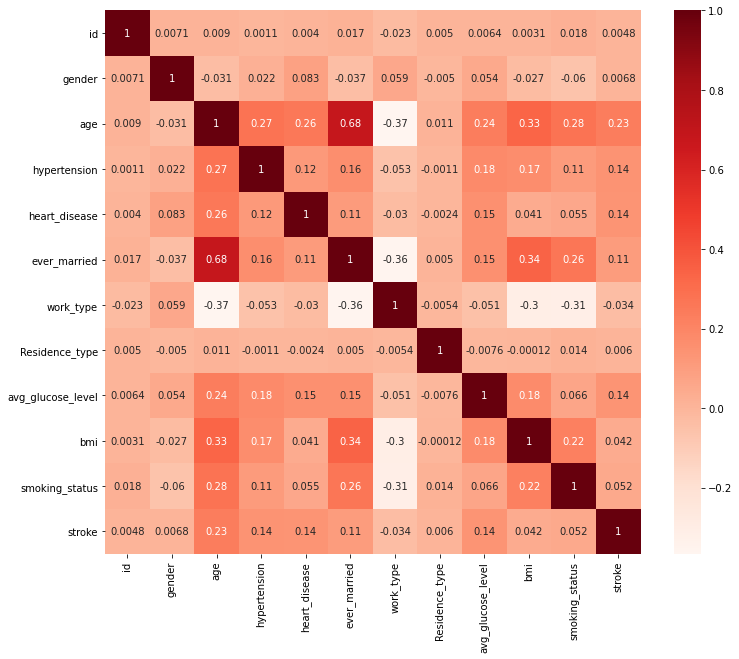

In [28]:
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

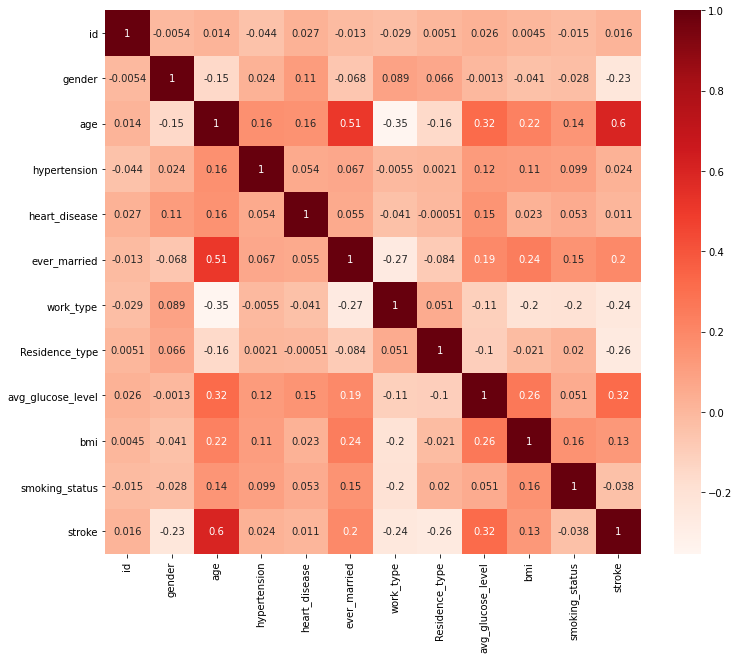

In [34]:
plt.figure(figsize=(12,10))
cor = over_data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

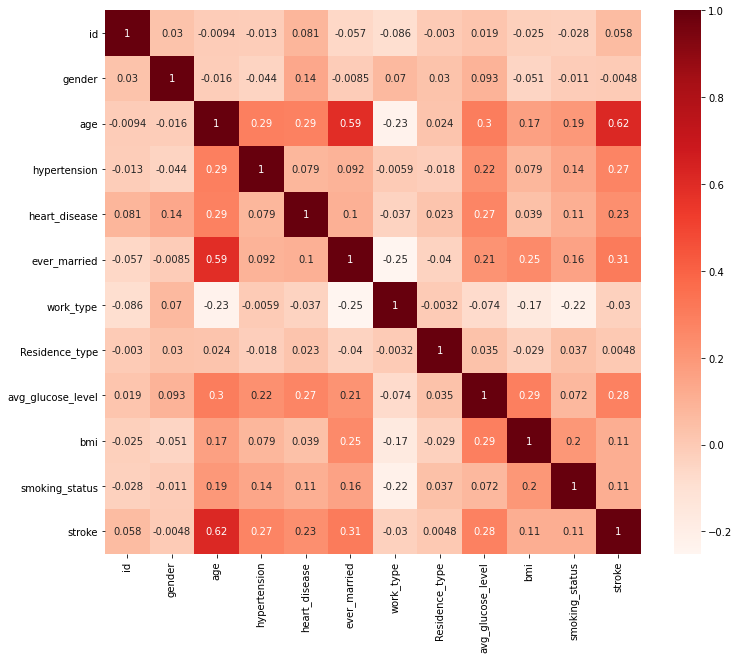

In [35]:
plt.figure(figsize=(12,10))
cor = down_data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()